(427, 640, 3)


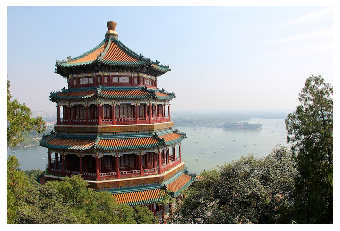

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
print(china.shape)
plt.imshow(china)
plt.axis('off')
plt.show()

(1, 70, 70, 3)
(1, 70, 70, 1)


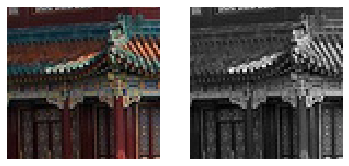

In [2]:
import numpy as np
china_cnn3 = china[150:220, 130:200][None,:,:,:]
china_cnn = china_cnn3.mean(axis=3)[:,:,:,None]
print(china_cnn3.shape)
print(china_cnn.shape)
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.squeeze(china_cnn3))
axes[0].axis('off')
axes[1].imshow(np.squeeze(china_cnn), cmap=plt.cm.gray)
axes[1].axis('off')
plt.show()

(427, 640, 3)


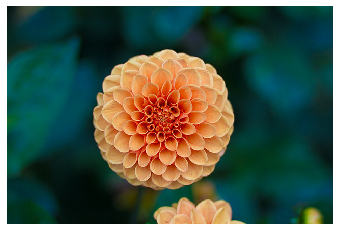

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
print(flower.shape)
plt.imshow(flower)
plt.axis('off')
plt.show()

(1, 70, 70, 3)
(1, 70, 70, 1)


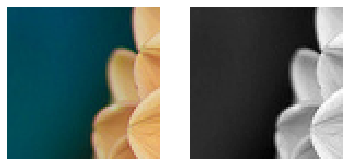

In [4]:
import numpy as np
flower_cnn3 = flower[150:220, 130:200][None,:,:,:]
flower_cnn = flower_cnn3.mean(axis=3)[:,:,:,None]
print(flower_cnn3.shape)
print(flower_cnn.shape)
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.squeeze(flower_cnn3))
axes[0].axis('off')
axes[1].imshow(np.squeeze(flower_cnn), cmap=plt.cm.gray)
axes[1].axis('off')
plt.show()

In [5]:
imgs = np.concatenate([china_cnn, flower_cnn], axis=0)
print(type(imgs))
print(imgs.shape)
print(imgs.dtype)
print(np.max(imgs), np.min(imgs))

<class 'numpy.ndarray'>
(2, 70, 70, 1)
float64
208.66666666666666 0.3333333333333333


# filters

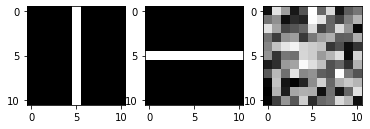

In [6]:
filters = np.zeros(shape=(11, 11, 1, 3), dtype=np.float32)
filters[:, 5, 0, 0] = 1 # filter zero (center vertical average)
filters[5, :, 0, 1] = 1 # filter one (center horizontal average)
filters[:, :, 0, 2] = np.random.uniform(size=(11, 11)) # filter two (random local average)
fig, axes = plt.subplots(1,3)
axes[0].imshow(filters[:, :, 0, 0], cmap=plt.cm.gray) # filter zero (center vertical average)
axes[1].imshow(filters[:, :, 0, 1], cmap=plt.cm.gray) # filter one (center horizontal average)
axes[2].imshow(filters[:, :, 0, 2], cmap=plt.cm.gray) # filter two (random local average)
plt.show()

# convolution

In [7]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 70, 70, 1))
w = tf.constant(filters)
x1 = tf.nn.conv2d(x, w, strides=[1,1,1,1], padding="SAME")
with tf.Session() as sess:
    imgs_out = x1.eval(feed_dict={x: imgs})
    print(imgs.shape)
    print(imgs_out.shape)

(2, 70, 70, 1)
(2, 70, 70, 3)


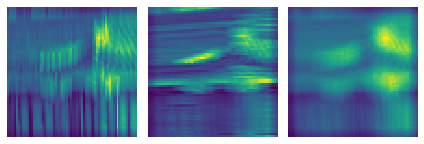

In [8]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[0,:,:,0]) # china vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[0,:,:,1]) # china horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[0,:,:,2]) # china random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

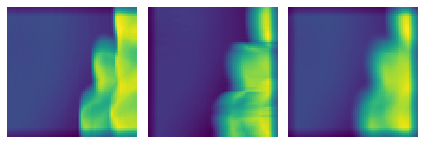

In [9]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[1,:,:,0]) # flower vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[1,:,:,1]) # flower horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[1,:,:,2]) # flower random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

# padding="SAME" vs padding="VALID"

In [10]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 70, 70, 1))
w = tf.constant(filters)
x1 = tf.nn.conv2d(x, w, strides=[1,1,1,1], padding="VALID")
with tf.Session() as sess:
    imgs_out = x1.eval(feed_dict={x: imgs})
    print(imgs.shape)
    print(imgs_out.shape)

(2, 70, 70, 1)
(2, 60, 60, 3)


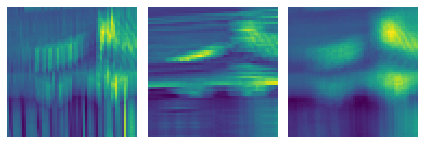

In [11]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[0,:,:,0]) # china vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[0,:,:,1]) # china horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[0,:,:,2]) # china random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

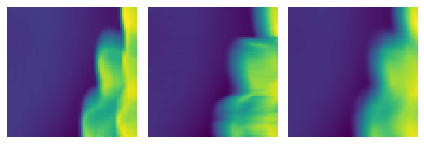

In [12]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[1,:,:,0]) # flower vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[1,:,:,1]) # flower horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[1,:,:,2]) # flower random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

# strides=[1,1,1,1] vs strides=[1,2,2,1]

In [13]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 70, 70, 1))
w = tf.constant(filters)
x1 = tf.nn.conv2d(x, w, strides=[1,2,1,1], padding="SAME")
with tf.Session() as sess:
    imgs_out = x1.eval(feed_dict={x: imgs})
    print(imgs.shape)
    print(imgs_out.shape)

(2, 70, 70, 1)
(2, 35, 70, 3)


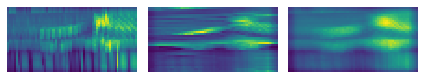

In [14]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[0,:,:,0]) # china vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[0,:,:,1]) # china horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[0,:,:,2]) # china random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

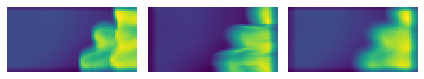

In [15]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[1,:,:,0]) # flower vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[1,:,:,1]) # flower horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[1,:,:,2]) # flower random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [16]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 70, 70, 1))
w = tf.constant(filters)
x1 = tf.nn.conv2d(x, w, strides=[1,1,2,1], padding="SAME")
with tf.Session() as sess:
    imgs_out = x1.eval(feed_dict={x: imgs})
    print(imgs.shape)
    print(imgs_out.shape)

(2, 70, 70, 1)
(2, 70, 35, 3)


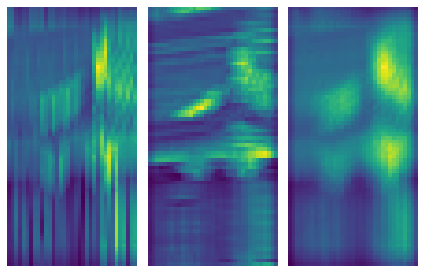

In [17]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[0,:,:,0]) # china vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[0,:,:,1]) # china horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[0,:,:,2]) # china random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

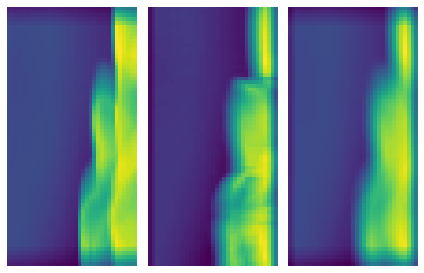

In [18]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[1,:,:,0]) # flower vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[1,:,:,1]) # flower horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[1,:,:,2]) # flower random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [19]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 70, 70, 1))
w = tf.constant(filters)
x1 = tf.nn.conv2d(x, w, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
    imgs_out = x1.eval(feed_dict={x: imgs})
    print(imgs.shape)
    print(imgs_out.shape)

(2, 70, 70, 1)
(2, 35, 35, 3)


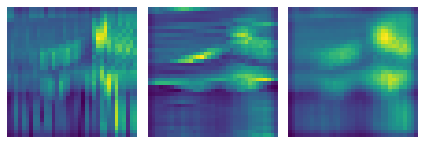

In [20]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[0,:,:,0]) # china vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[0,:,:,1]) # china horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[0,:,:,2]) # china random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()

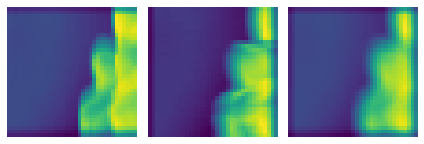

In [21]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imgs_out[1,:,:,0]) # flower vertical convolution
axes[0].axis('off')
axes[1].imshow(imgs_out[1,:,:,1]) # flower horizontal convolution
axes[1].axis('off')
axes[2].imshow(imgs_out[1,:,:,2]) # flower random local average convolution
axes[2].axis('off')
plt.tight_layout()
plt.show()